D:\Python\Jupyter


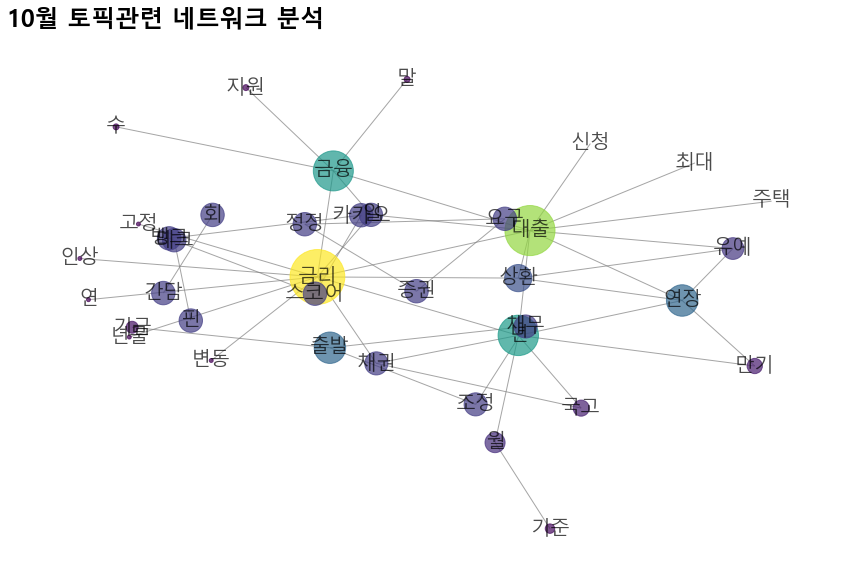

In [1]:
import numpy as np
import pandas as pd
import re
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm 
import matplotlib.font_manager as fm 
from konlpy.tag import Okt
from apyori import apriori
from matplotlib import rc
from collections import Counter
import os


#현재 연, 월값 가져오기
cnt= str(datetime.datetime.now().year) +str(datetime.datetime.now().month)
month=str(datetime.datetime.now().month)
f = open("data/경제"+cnt+".txt","r") # 해당월에 해당되는 파일 오픈, 읽기전용
text=f.read()
text= text.replace('\n', '')
text= text.replace('[강원도 제공·재판매 및 DB 금지]', '')
text= text.replace('▶ 여기를 누르시면 크게 보실 수 있습니다', '')
text= text.replace('[연합뉴스 자료 사진]', '')
text= text.replace('[연합뉴스]', '')

text= text.replace('Copyrights ⓒ 연합뉴스. 무단 전재 및 재배포금지', '')
text= text.replace('''[신찬옥 기자]
[ⓒ 매일경제 & mk.co.kr, 무단전재 및 재배포 금지]
업무보고하는 한상혁 방송통신위원회 위원장''', '')
text= text.replace('매일 경제', '')
text= text.replace('기자', '')
text= text.replace('배포 금지', '')
text= text.replace('등', '')
text= text.replace('무단', '')
text= text.replace('및', '')



#문장 단위로 글을 구분
lines= text.split(".")


#Okt 객체 생성
okt = Okt()

data=[]
for line in range(len(lines)):
    # 문장에서 한글, 영어, 띄어쓰기가 아닌것은 공백으로 바꾸고 명사만 추출
    words = okt.pos(re.sub('[^가-힣a-zA-Z\s]', '', lines[line]))
  
    temp = []
    for word in words:
        if word[1] =='Noun': 
            temp.append(word[0])
    if len(temp)>= 1:
        data.append(temp)

#폰트설정
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



#연관관계 분석
result = (list(apriori(data, min_support=0.02)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))

df = df[(df['length'] == 2) &(df['support']>=0.01)].sort_values(by='support',ascending=False)
df.head(10)
G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

pr = nx.pagerank(G)


#현재 작업 디렉토리
current_path = os.getcwd()
print(current_path)
#변경 디렉토리
os.chdir('C:/Users/big1-01/Desktop/project/renewkdi2/renewKDI/src/main/resources/static/images/bigdata')

nsize = np.array([v for v in pr.values()])
nsize = 3000 * (nsize - min(nsize)) / (max(nsize)-min(nsize))
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(15,10))
plt.axis('off')

title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}

path = 'C:\windows\fonts\HMFMMUEX.TTC'
nx.draw_networkx(G, font_family=font_name, font_size=20,
                pos=pos, node_color=list(pr.values()), node_size=nsize,
                alpha=0.7, edge_color='.5')
plt.title(month+'월 토픽관련 네트워크 분석',fontdict=title_font,loc='left')
plt.savefig('경제연관어분석', bbox_inches='tight')
plt.show()



